In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl

In [129]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [130]:
def hypergeometric(k, K, n, N): 
    k, K, n, N = int(k), int(K), int(n), int(N)
    return math.comb(K, k) * math.comb(N - K, n - k) / math.comb(N, n)

In [131]:
k = 10 
K = 100
n = 60 

N_vals = np.linspace(100, 2250, 1000)
likelihood= np.array([hypergeometric(k, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood /= likelihood.sum() # Normalize

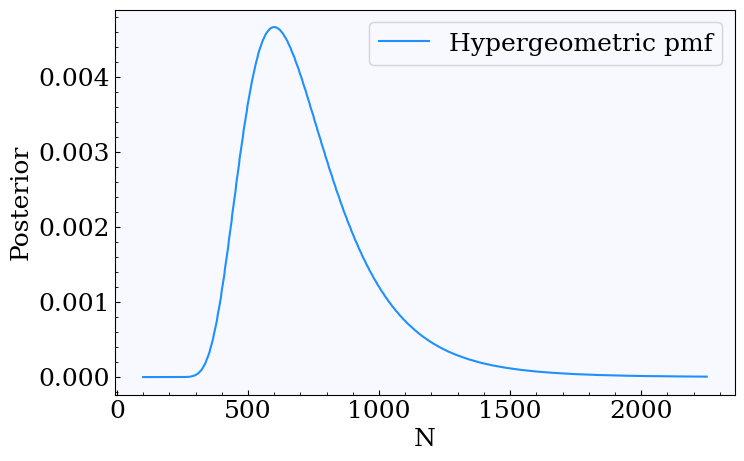

In [132]:
# For a flat prior the likelihood is the posterior

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_vals, likelihood, label='Hypergeometric pmf')
ax.set(xlabel='N', 
       ylabel='Posterior',)
ax.legend();

# Exercise 2

In [133]:
# For flat priors, the likelihood is proportional to the posterior
k2 = 15 
likelihood2= np.array([hypergeometric(k2, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood2 /= likelihood2.sum() # Normalize


# Prior of the form 1/N 
# This prior increases the probability for a lower propulation N
prior = 1 / N_vals 
prior /= prior.sum() # Normalize the prior
posterior1 = likelihood * prior
posterior2 = likelihood2 * prior

posterior1 /= posterior1.sum() # Normalize
posterior2 /= posterior2.sum() # Normalize

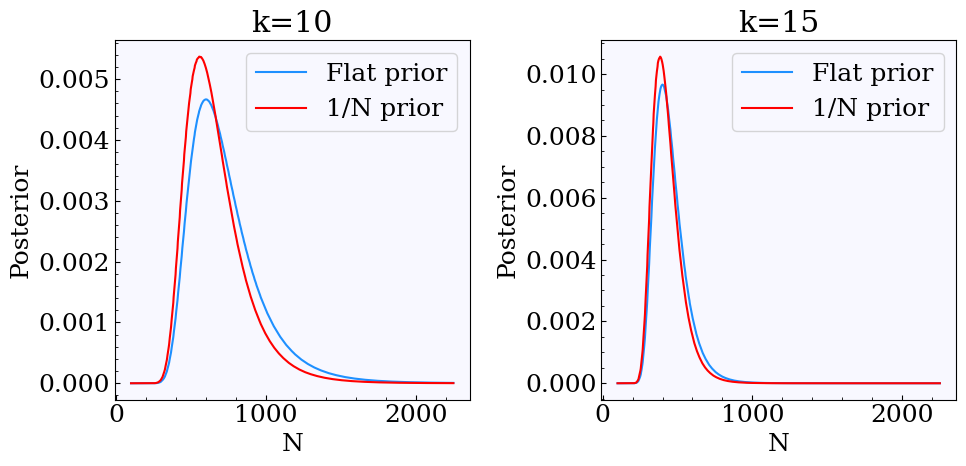

In [134]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].plot(N_vals, likelihood, label='Flat prior')
axs[0].plot(N_vals, posterior1, label='1/N prior')

axs[0].set(xlabel='N', 
           ylabel='Posterior',
           title='k=10')
axs[0].legend()

axs[1].plot(N_vals, likelihood2, label='Flat prior')
axs[1].plot(N_vals, posterior2, label='1/N prior')

axs[1].set(xlabel='N',
           ylabel='Posterior',
           title='k=15')
axs[1].legend()

fig.tight_layout()

In [135]:
best_estimate_flat1 = N_vals[np.argmax(likelihood)]
best_estimate_flat2 = N_vals[np.argmax(likelihood2)]
best_estimate_prior1 = N_vals[np.argmax(posterior1)]
best_estimate_prior2 = N_vals[np.argmax(posterior2)]

print(f'Best estimate for k=10 with flat prior: {best_estimate_flat1}')
print(f'Best estimate for k=10 with 1/N prior: {best_estimate_prior1}')
print(f'Best estimate for k=15 with flat prior: {best_estimate_flat2}')
print(f'Best estimate for k=15 with 1/N prior: {best_estimate_prior2}')

Best estimate for k=10 with flat prior: 599.2992992992993
Best estimate for k=10 with 1/N prior: 556.2562562562563
Best estimate for k=15 with flat prior: 399.14914914914914
Best estimate for k=15 with 1/N prior: 384.0840840840841


# Fish Exercise 

In [158]:
k = 4
n = 30 
K = 50 

likelihood_fish = np.array([hypergeometric(k, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood_fish /= likelihood_fish.sum() # Normalize

# The prior is now Gaussian 
mu_fish, sigma_fish = 10, 1 
mu_lake, sigma_lake = 5000, 300

mu_N_fish = mu_lake / mu_fish
sigma_N_fish = np.sqrt((sigma_lake / mu_fish)**2 + (sigma_fish * mu_lake / mu_fish**2)**2)

print(f'Error propagations for fish in the lake: {mu_N_fish:.1f} +/- {sigma_N_fish:.1f}')
# Jason says that the correct error is 61. Figure out why. We can Monte Carlo this to get the correct error
sample_fish = np.random.normal(mu_fish, sigma_fish, 10000)
sample_lake = np.random.normal(mu_lake, sigma_lake, 10000)
sample_N = sample_lake / sample_fish
print(f'Error from Monte Carlo: {sample_N.mean():.1f} +/- {sample_N.std():.1f}')

# Use the Monte Carlo error
mu_N_fish = sample_N.mean()
sigma_N_fish = sample_N.std()

prior_fish = scipy.stats.norm.pdf(N_vals, mu_N_fish, sigma_N_fish)
prior_fish /= prior_fish.sum() # Normalize
likelihood_fish = np.array([hypergeometric(k, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood_fish /= likelihood_fish.sum() # Normalize
posterior_fish = likelihood_fish * prior_fish
posterior_fish /= posterior_fish.sum() # Normalize

Error propagations for fish in the lake: 500.0 +/- 58.3
Error from Monte Carlo: 504.9 +/- 60.4


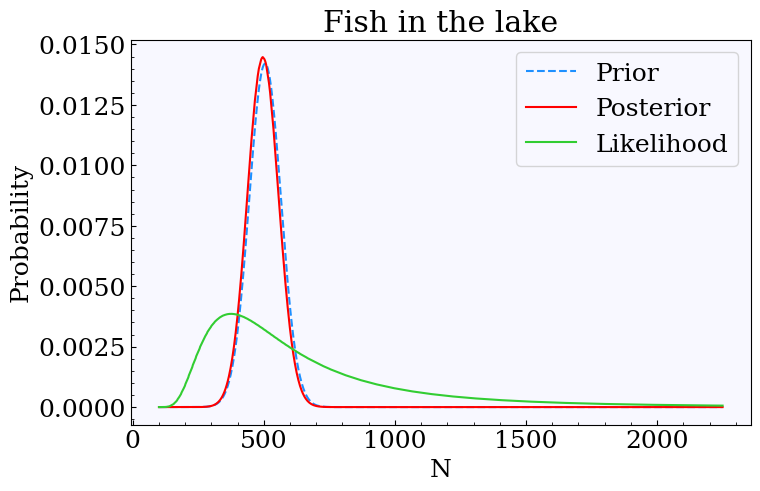

In [159]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_vals, prior_fish, ls='--', label='Prior')
ax.plot(N_vals, posterior_fish, label='Posterior')
ax.plot(N_vals, likelihood_fish, label='Likelihood')

ax.set(xlabel='N',
       ylabel='Probability',
       title='Fish in the lake')
ax.legend()

In [149]:
k = 8
n = 30 
K = 50 

likelihood_fish = np.array([hypergeometric(k, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood_fish /= likelihood_fish.sum() # Normalize

# The prior is now Gaussian 
mu_fish, sigma_fish = 10, 1 
mu_lake, sigma_lake = 5000, 300

mu_N_fish = mu_lake / mu_fish
sigma_N_fish = np.sqrt((sigma_lake / mu_fish)**2 + (sigma_fish * mu_lake / mu_fish**2)**2)

print(f'Error propagations for fish in the lake: {mu_N_fish:.0f} +/- {sigma_N_fish:.0f}')

prior_fish = scipy.stats.norm.pdf(N_vals, mu_N_fish, sigma_N_fish)
prior_fish /= prior_fish.sum() # Normalize
likelihood_fish = np.array([hypergeometric(k, K, n, N_vals[i]) for i in range(len(N_vals))])
likelihood_fish /= likelihood_fish.sum() # Normalize
posterior_fish = likelihood_fish * prior_fish
posterior_fish /= posterior_fish.sum() # Normalize

Error propagations for fish in the lake: 500 +/- 58


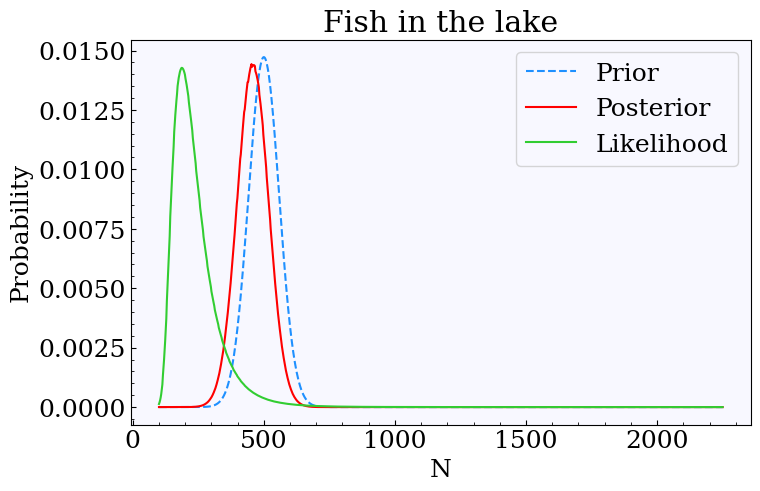

In [150]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_vals, prior_fish, ls='--', label='Prior')
ax.plot(N_vals, posterior_fish, label='Posterior')
ax.plot(N_vals, likelihood_fish, label='Likelihood')


ax.set(xlabel='N',
       ylabel='Probability',
       title='Fish in the lake')
ax.legend()